In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
data = pd.read_csv('fifa.csv')
data

,Date,ARG,BRA,ESP,FRA,GER,ITA
0,1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1,1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
2,1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
3,1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
4,1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0
...,...,...,...,...,...,...,...
281,2018-02-15,4.0,2.0,6.0,9.0,1.0,14.0
282,2018-03-15,4.0,2.0,6.0,9.0,1.0,14.0
283,2018-04-12,5.0,2.0,8.0,7.0,1.0,20.0
284,2018-05-17,5.0,2.0,8.0,7.0,1.0,20.0


In [33]:
data.head().T

,0,1,2,3,4
Date,1993-08-08,1993-09-23,1993-10-22,1993-11-19,1993-12-23
ARG,5.0,12.0,9.0,9.0,8.0
BRA,8.0,1.0,1.0,4.0,3.0
ESP,13.0,14.0,7.0,7.0,5.0
FRA,12.0,7.0,14.0,15.0,15.0
GER,1.0,5.0,4.0,3.0,1.0
ITA,2.0,2.0,3.0,1.0,2.0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    286 non-null    object 
 1   ARG     286 non-null    float64
 2   BRA     286 non-null    float64
 3   ESP     286 non-null    float64
 4   FRA     286 non-null    float64
 5   GER     286 non-null    float64
 6   ITA     286 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


In [35]:
data["Date"]= pd.to_datetime(data["Date"])
data["Date"]


0     1993-08-08
1     1993-09-23
2     1993-10-22
3     1993-11-19
4     1993-12-23
         ...    
281   2018-02-15
282   2018-03-15
283   2018-04-12
284   2018-05-17
285   2018-06-07
Name: Date, Length: 286, dtype: datetime64[ns]

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    286 non-null    datetime64[ns]
 1   ARG     286 non-null    float64       
 2   BRA     286 non-null    float64       
 3   ESP     286 non-null    float64       
 4   FRA     286 non-null    float64       
 5   GER     286 non-null    float64       
 6   ITA     286 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 15.8 KB


In [37]:
data.describe()

,Date,ARG,BRA,ESP,FRA,GER,ITA
count,286,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,2006-05-18 04:21:49.090909056,5.454545,3.171329,5.321678,8.958042,5.104895,8.353147
min,1993-08-08 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2000-05-17 00:00:00,3.000000,1.000000,2.000000,3.000000,2.000000,4.000000
50%,2006-06-14 00:00:00,5.000000,1.500000,5.000000,7.000000,4.000000,8.000000
75%,2012-06-27 00:00:00,7.000000,4.000000,8.000000,15.000000,5.000000,12.000000
max,2018-06-07 00:00:00,24.000000,22.000000,25.000000,27.000000,22.000000,20.000000
std,NaN,4.012659,3.620897,3.908787,6.822948,4.354813,4.514822


<Axes: >

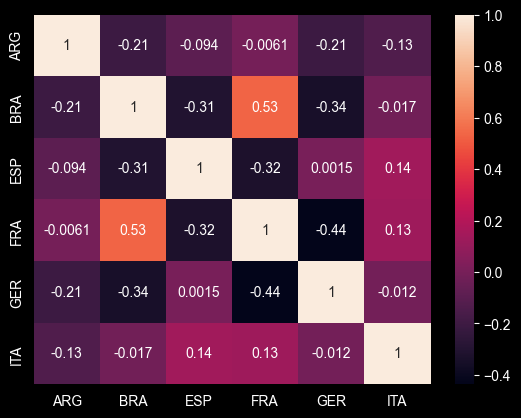

In [38]:
a=data[["ARG","BRA","ESP","FRA","GER","ITA"]]
b= a.corr()
sns.heatmap(b,annot=True)

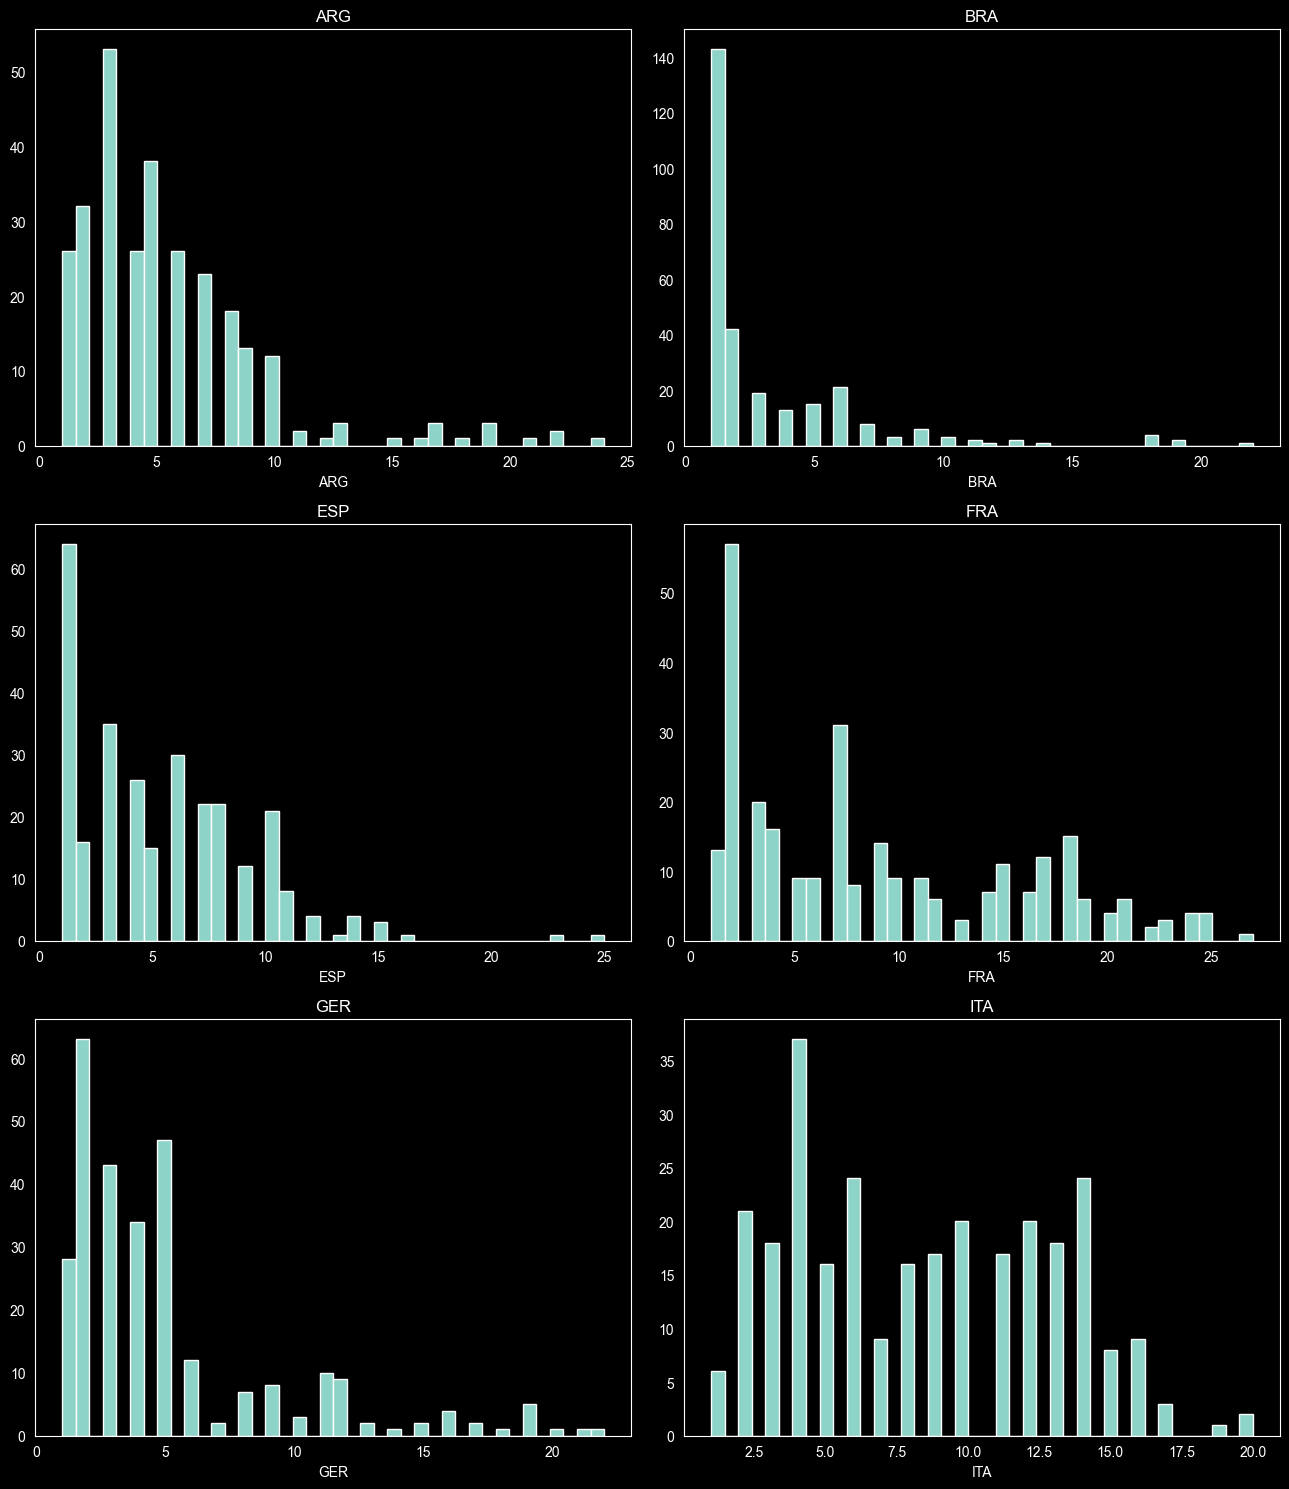

In [39]:
a=data[["ARG","BRA","ESP","FRA","GER","ITA"]]
fig, axs = plt.subplots(3, 2, figsize=(13, 15))
axs = axs.ravel()

for i, col in enumerate(a):
    axs[i].hist(data[col], bins=40)
    axs[i].set_xlabel(col)
  
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

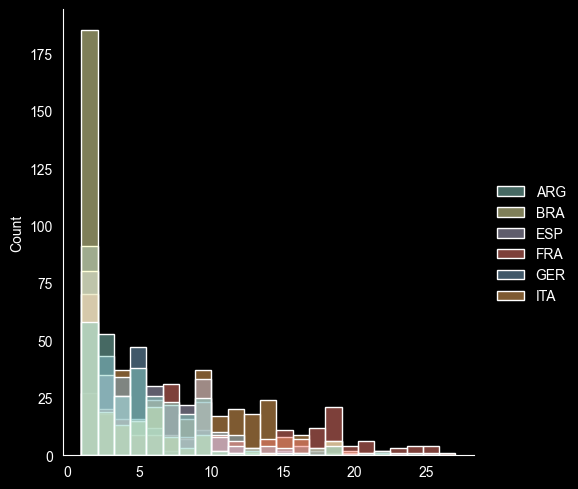

In [40]:
sns.displot(a)
sns.set_style('dark')

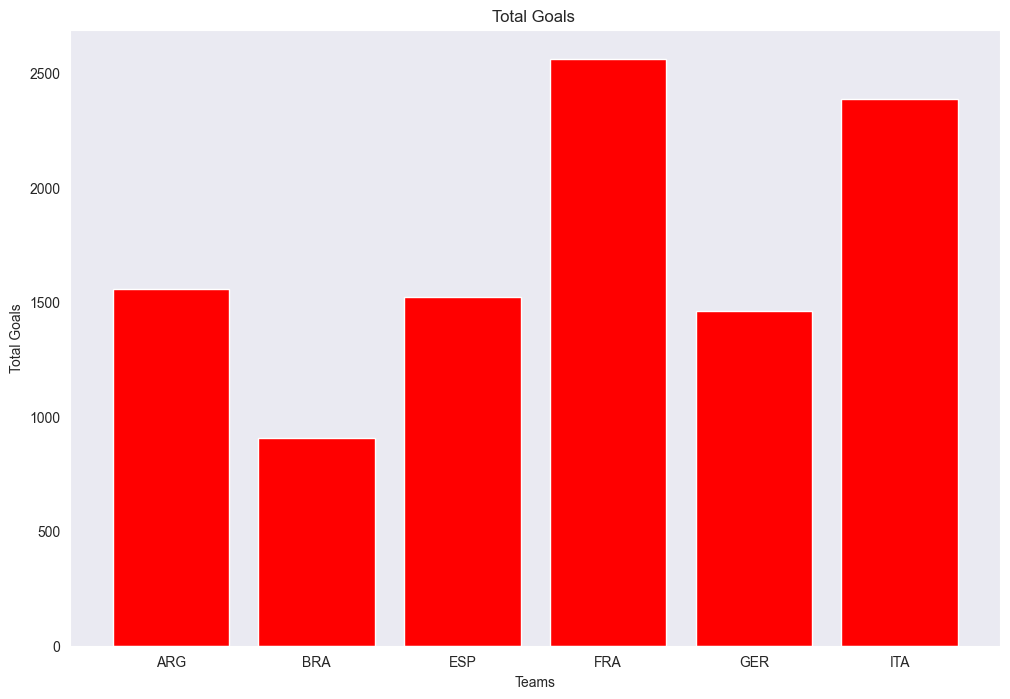

In [41]:

plt.figure(figsize=(12,8))
plt.bar(x=['ARG', 'BRA', 'ESP', 'FRA', 'GER', 'ITA'], height=data[['ARG', 'BRA', 'ESP', 'FRA', 'GER', 'ITA']].sum(), color="red")
plt.xlabel("Teams")
plt.ylabel("Total Goals")
plt.title("Total Goals ");

<Axes: >

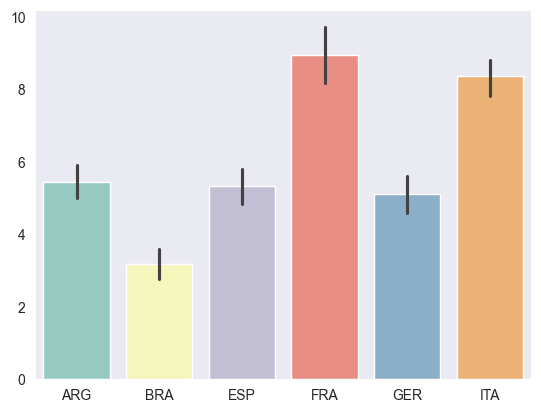

In [42]:
sns.barplot(a)

In [43]:
data['Goals'] = data.drop(['Date'], axis=1).sum(axis=1)
data.head()

,Date,ARG,BRA,ESP,FRA,GER,ITA,Goals
0,1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0,41.0
1,1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0,41.0
2,1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0,38.0
3,1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0,39.0
4,1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0,34.0


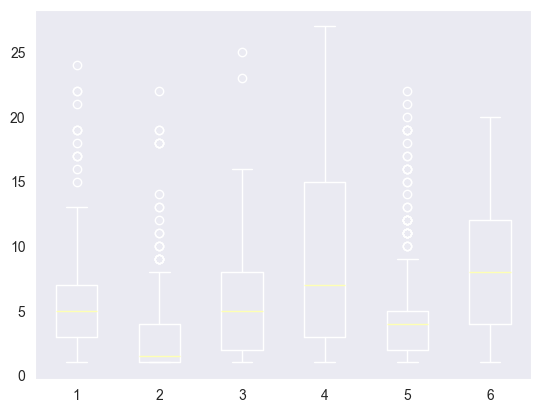

In [44]:
b=data[["ARG","BRA","ESP","FRA","GER","ITA"]]
plt.boxplot(b)
plt.show()

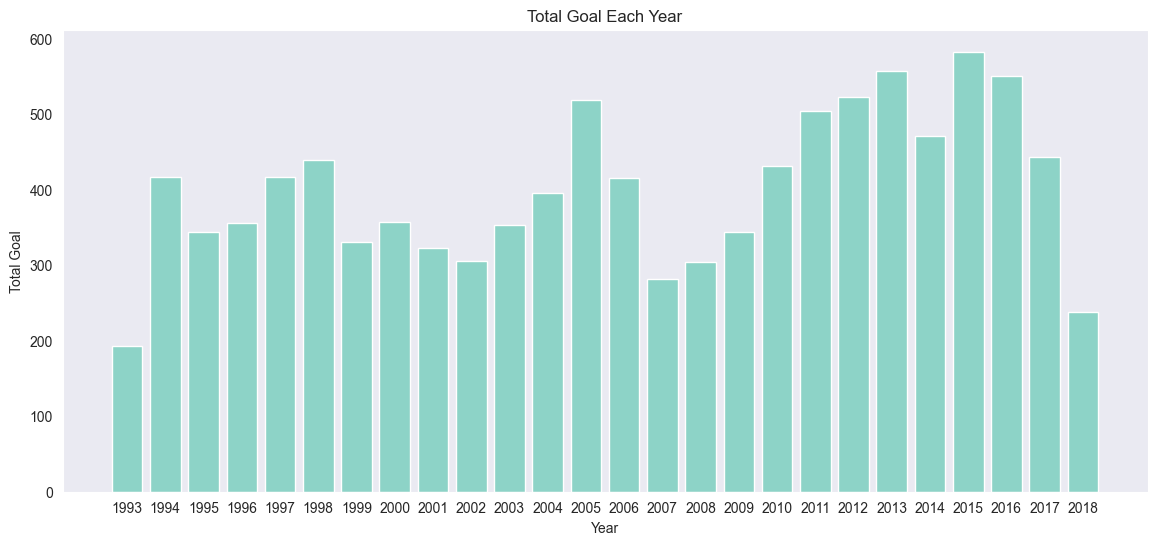

In [45]:
plt.figure(figsize=(14, 6))
plt.bar(x=data["Date"].dt.year.unique() ,height=data.groupby(data["Date"].dt.year)["Goals"].sum())
plt.xlabel("Year")
plt.ylabel("Total Goal")
plt.title("Total Goal Each Year")
plt.xticks(data["Date"].dt.year.unique());

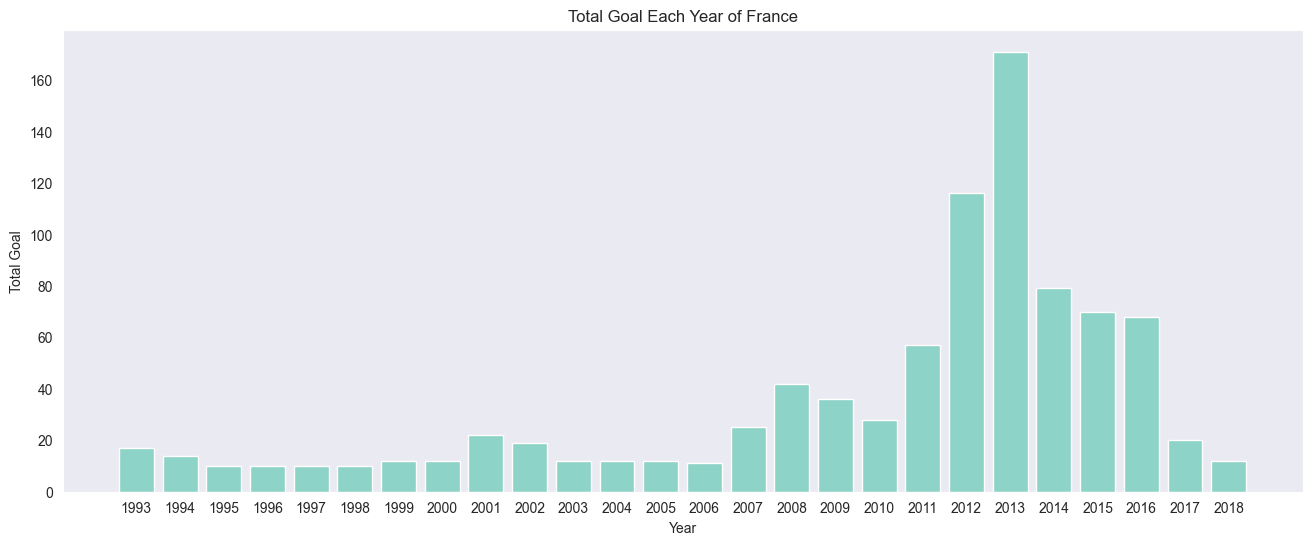

In [46]:
plt.figure(figsize=(16, 6))
plt.bar(x=data["Date"].dt.year.unique() ,height=data.groupby(data["Date"].dt.year)["BRA"].sum())
plt.xlabel("Year")
plt.ylabel("Total Goal")
plt.title("Total Goal Each Year of France")
plt.xticks(data["Date"].dt.year.unique());

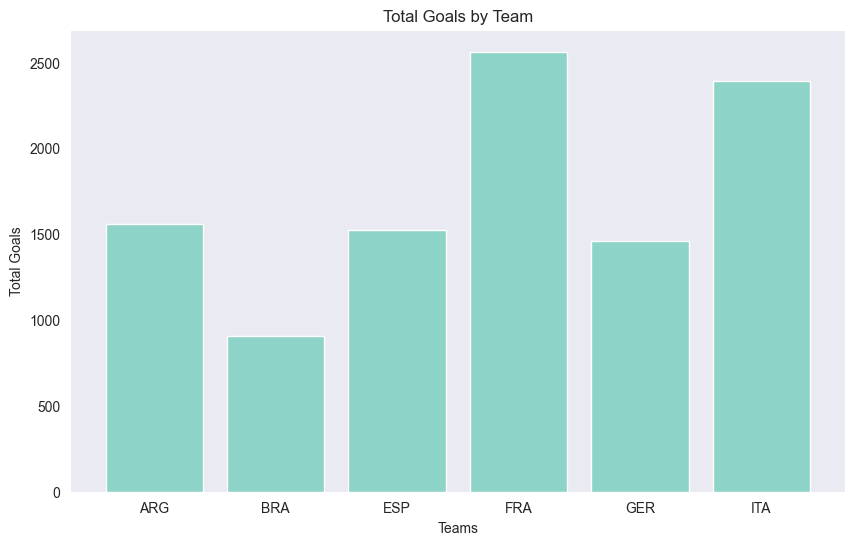

In [51]:
plt.figure(figsize=(10,6))
plt.bar(x=['ARG', 'BRA', 'ESP', 'FRA', 'GER', 'ITA'], 
        height=data[['ARG', 'BRA', 'ESP', 'FRA', 'GER', 'ITA']].sum())
plt.xlabel("Teams")
plt.ylabel("Total Goals")
plt.title("Total Goals by Team");

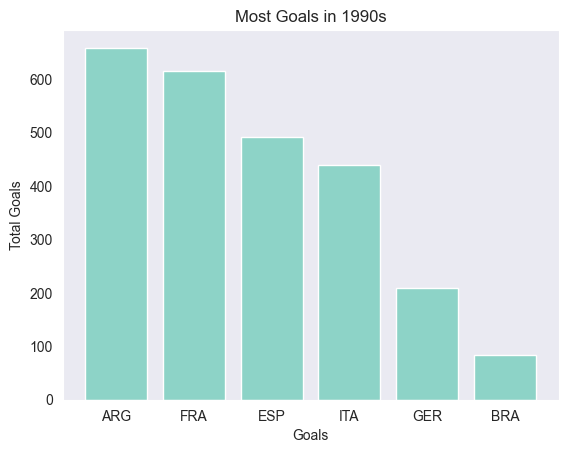

In [48]:
plt.bar(x=data[data["Date"].dt.year < 2000].drop(["Date", "Goals"], axis=1).sum().sort_values(ascending=False).index,
        height=data[data["Date"].dt.year < 2000].drop(["Date", "Goals"], axis=1).sum().sort_values(ascending=False));
plt.xlabel("Goals")
plt.ylabel("Total Goals")
plt.title("Most Goals in 1990s");

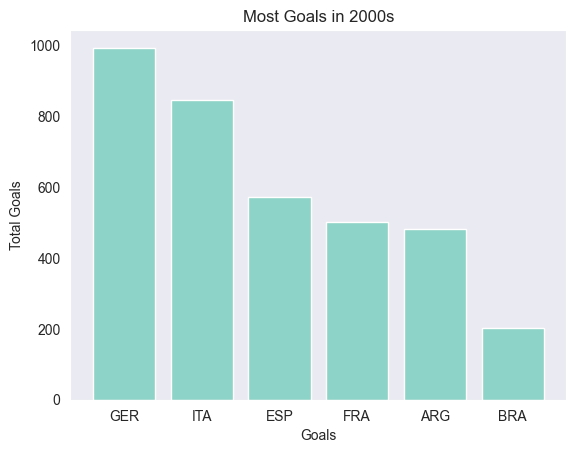

In [49]:
plt.bar(x=data[(data["Date"].dt.year < 2010) & (data["Date"].dt.year >= 2000)].drop(["Date", "Goals"], axis=1).sum().sort_values(ascending=False).index,
        height=data[(data["Date"].dt.year < 2010) & (data["Date"].dt.year >= 2000)].drop(["Date", "Goals"], axis=1).sum().sort_values(ascending=False));
plt.xlabel("Goals")
plt.ylabel("Total Goals")
plt.title("Most Goals in 2000s");

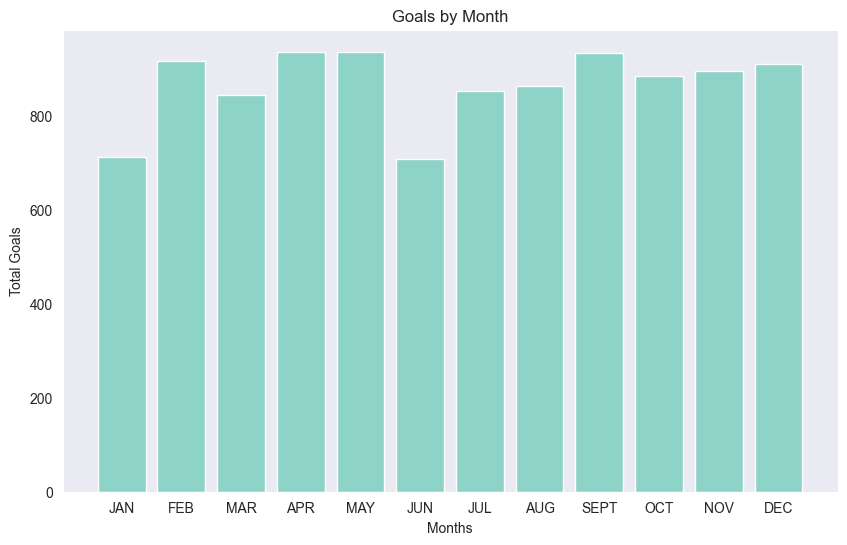

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEPT", "OCT", "NOV", "DEC"],
        data.groupby(data["Date"].dt.month)["Goals"].sum())
plt.xlabel("Months")
plt.ylabel("Total Goals")
plt.title("Goals by Month");